# HW4: Spam
Create a classifier for Spam Email (text) and calculate the accuracy

### Import train and test dataset

In [1]:
import pandas as pd
df=pd.read_csv("/Users/teresazhang/Documents/NTU/Y3S1/BC3409/Assignment/HW4/spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [2]:
df = df[df['Category'].isin(['spam','ham'])]
X = df['Message'].tolist()
Y = df['Category'] == 'spam'

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
X_CV = CountVectorizer().fit_transform(X)

In [5]:
X_CV

<5572x8709 sparse matrix of type '<class 'numpy.int64'>'
	with 74098 stored elements in Compressed Sparse Row format>

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_CV, Y, random_state=1)

## Machine learning

### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
model = LogisticRegression(random_state=1)
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy is:", (cm[0,0]+cm[1,1])/sum(sum(cm)))

Accuracy is: 0.9870782483847811


<AxesSubplot:>

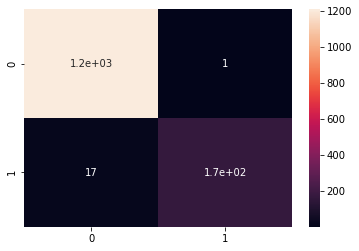

In [11]:
import seaborn as sns
sns.heatmap(cm, annot=True)

## TFIDF

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

X_train = TfidfTransformer().fit_transform(X_train)
X_test = TfidfTransformer().fit_transform(X_test)

### Logistic Regression

In [13]:
model = LogisticRegression(random_state=1)
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy is:", (cm[0,0]+cm[1,1])/sum(sum(cm)))

Accuracy is: 0.9691313711414213


<AxesSubplot:>

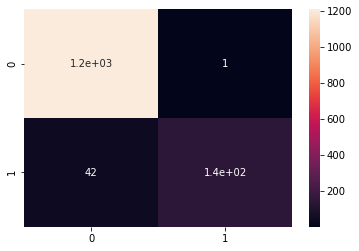

In [14]:
import seaborn as sns
sns.heatmap(cm, annot=True)

### Decision Tree

In [15]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy is:",(cm[0,0]+cm[1,1])/sum(sum(cm)))

Accuracy is: 0.9712849964106246


<AxesSubplot:>

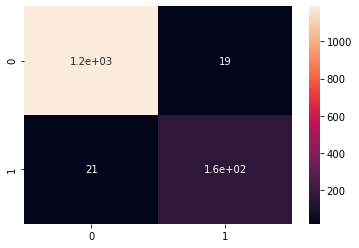

In [16]:
import seaborn as sns
sns.heatmap(cm, annot=True)

### Random Forest

In [17]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy is:",(cm[0,0]+cm[1,1])/sum(sum(cm)))

Accuracy is: 0.9806173725771715


<AxesSubplot:>

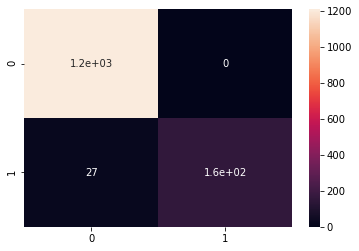

In [18]:
import seaborn as sns
sns.heatmap(cm, annot=True)

### Gradient Boosting

In [19]:
model = ensemble.GradientBoostingClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy is:",(cm[0,0]+cm[1,1])/sum(sum(cm)))

Accuracy is: 0.968413496051687


<AxesSubplot:>

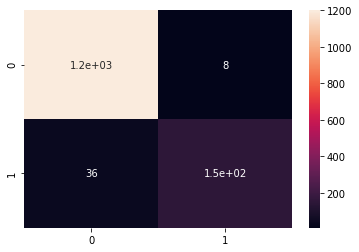

In [20]:
import seaborn as sns
sns.heatmap(cm, annot=True)

### Neural Network

In [21]:
from sklearn import neural_network
model = neural_network.MLPClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy is:",(cm[0,0]+cm[1,1])/sum(sum(cm)))

Accuracy is: 0.9892318736539842


<AxesSubplot:>

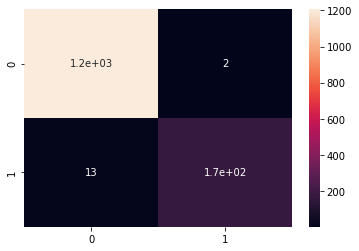

In [22]:
import seaborn as sns
sns.heatmap(cm, annot=True)

## BERT

In [23]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [24]:
X_emb = model.encode(X)

In [25]:
X_emb.shape

(5572, 768)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_emb, Y, random_state=1)

### Logistic Regression

In [27]:
model = LogisticRegression(random_state=1)
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy is:", (cm[0,0]+cm[1,1])/sum(sum(cm)))

Accuracy is: 0.9892318736539842


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

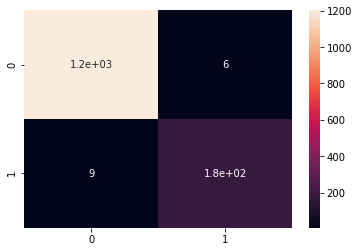

In [28]:
import seaborn as sns
sns.heatmap(cm, annot=True)

### Decision Tree

In [29]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy is:",(cm[0,0]+cm[1,1])/sum(sum(cm)))

Accuracy is: 0.9404163675520459


<AxesSubplot:>

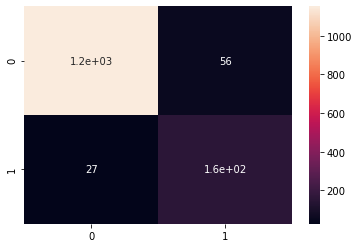

In [30]:
import seaborn as sns
sns.heatmap(cm, annot=True)

### Random Forest

In [31]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy is:",(cm[0,0]+cm[1,1])/sum(sum(cm)))

Accuracy is: 0.9727207465900933


<AxesSubplot:>

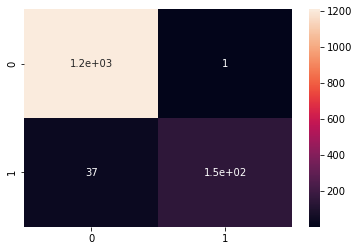

In [32]:
import seaborn as sns
sns.heatmap(cm, annot=True)

### Gradient Boosting

In [33]:
model = ensemble.GradientBoostingClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy is:",(cm[0,0]+cm[1,1])/sum(sum(cm)))

Accuracy is: 0.9806173725771715


<AxesSubplot:>

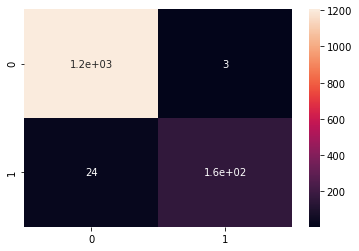

In [34]:
import seaborn as sns
sns.heatmap(cm, annot=True)

### Neural Network

In [35]:
from sklearn import neural_network
model = neural_network.MLPClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy is:",(cm[0,0]+cm[1,1])/sum(sum(cm)))

Accuracy is: 0.9885139985642498


<AxesSubplot:>

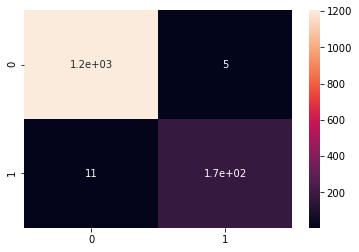

In [36]:
import seaborn as sns
sns.heatmap(cm, annot=True)

### Why is it important to know text analytics?
Each text that we use has a meaning and a purpose of its own. Emails. Short text messages. Tweets. Facebook statuses. Blogs. Live chat excerpts. Customer support notes. Survey results. The list of textual data is endless. Finding out the meaning and purpose of the text is the goal of text analytics.

In the past decade, as the volume of unstructured data exploded, the manual approach to text analytics was proven to be ineffective and unproductive. The amount of labor required to carry out text analytics made the manual approach inefficient.

Text analytics is a process of converting unstructured text data into a meaningful form that can be used analyzed. The process helps in various things, including analyzing customer feedback, entity modeling, product reviews and more.

In this context, text analytics is used to identify spam emails.

### How can classification of spam email help your company?
Spam mails need to be deleted as it can choke email inboxes if not properly filtered and regularly deleted, as well as a threat. If not deleted, they might trick potential victims into downloading malware, sharing data or sending money.

Since I work in a big MNC, the amount of emails the company received per day will be huge. It will be very tedious to look through the emails one by one to delete the spam mails. Thus, text analytics is important to classify spam emails to drastically cut down on the amount of emails to look through before deleting the spam emails, thus migitating their risks.

### What do you need to get a better result?
1. Identify the stopwords for this context
2. Undertake a classification algorithm on a cleaned corpus rather than a noisy corpus
3. Eliminating features with extremely low frequency
4. Normalized Corpus to their root forms